# India Airline Flights

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Problem Statement

- Menganalisis bagaimana **jumlah hari sebelum keberangkatan (`days_left`)** memengaruhi harga tiket
- Membandingkan strategi harga antar **maskapai (`airline`)** untuk berbagai **kelas penerbangan (`class`)**
- Menemukan pola waktu keberangkatan/ketibaan (`departure_time`, `arrival_time`) yang mungkin memengaruhi tarif atau preferensi pelanggan
- Menilai pengaruh **jumlah transit (`stops`)** dan **durasi penerbangan (`duration`)** terhadap pengalaman dan harga
- Mengidentifikasi fitur-fitur apa saja yang paling berpengaruh terhadap **variabilitas harga tiket (`price`)**

## Data Understanding

In [3]:
df = pd.read_csv("airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Ukuran dataset
rows, cols = df.shape

print("=== Informasi Ukuran Dataset ===\n")
print(f"Dataset terdiri dari {rows} baris dan {cols} kolom.\n")

=== Informasi Ukuran Dataset ===

Dataset terdiri dari 300153 baris dan 12 kolom.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### A. Deskripsi Kolom

| Nama Kolom         | Deskripsi                                                                 |
|--------------------|---------------------------------------------------------------------------|
| `index`            | Nomor indeks baris data (biasanya tidak memiliki makna analitis khusus)   |
| `airline`          | Nama maskapai penerbangan yang menyediakan layanan                        |
| `flight`           | Nomor atau kode penerbangan                                               |
| `source_city`      | Kota asal keberangkatan pesawat                                           |
| `departure_time`   | Waktu keberangkatan pesawat                                               |
| `stops`            | Jumlah pemberhentian (transit) dalam perjalanan                           |
| `arrival_time`     | Waktu kedatangan pesawat di kota tujuan                                   |
| `destination_city` | Kota tujuan akhir penerbangan                                             |
| `class`            | Kelas tiket penerbangan (misalnya: Economy, Business)                     |
| `duration`         | Lama waktu penerbangan dalam satuan jam                                   |
| `days_left`        | Jumlah hari yang tersisa antara tanggal pemesanan dan tanggal keberangkatan |
| `price`            | Harga tiket pesawat dalam satuan mata uang tertentu                       |


### B. Missing Value

In [7]:
missing = df.isna().sum()
total_missing = missing.sum()
missing_values = df.isna().sum().sum()/len(df)*100

print("=== Missing Values Summary ===\n")

if total_missing > 0:
    for col, val in missing.items():
        if val > 0:
            print(f"Terdapat missing values pada kolom {col} sebesar {val} nilai atau sebesar {missing_values:.2f}%")
else:
    print("✅ Tidak ada missing values di dataset.")

=== Missing Values Summary ===

✅ Tidak ada missing values di dataset.


### C. Duplicated Data

In [8]:
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print("=== Duplicate Rows Summary ===\n")

if num_duplicates > 0:
    print("Berikut beberapa contoh duplikat:")
    display(duplicate_rows.head())
else:
    print("✅ Tidak ada baris duplikat yang ditemukan di dataset.")

=== Duplicate Rows Summary ===

✅ Tidak ada baris duplikat yang ditemukan di dataset.


### D. Unique Value for Each Columns

In [9]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col}: {len(uniques)} unique values")
    print(uniques)
    print()

index: 300153 unique values
[     0      1      2 ... 300150 300151 300152]

airline: 6 unique values
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

flight: 1561 unique values
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']

source_city: 6 unique values
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

departure_time: 6 unique values
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

stops: 3 unique values
['zero' 'one' 'two_or_more']

arrival_time: 6 unique values
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

destination_city: 6 unique values
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

class: 2 unique values
['Economy' 'Business']

duration: 476 unique values
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3

## Data Cleaning

### Drop Column

In [10]:
df.drop('index', axis=1, inplace=True)

## Exploratory Data Analysis

### A. Distribusi dan Boxplot Kolom Numerik

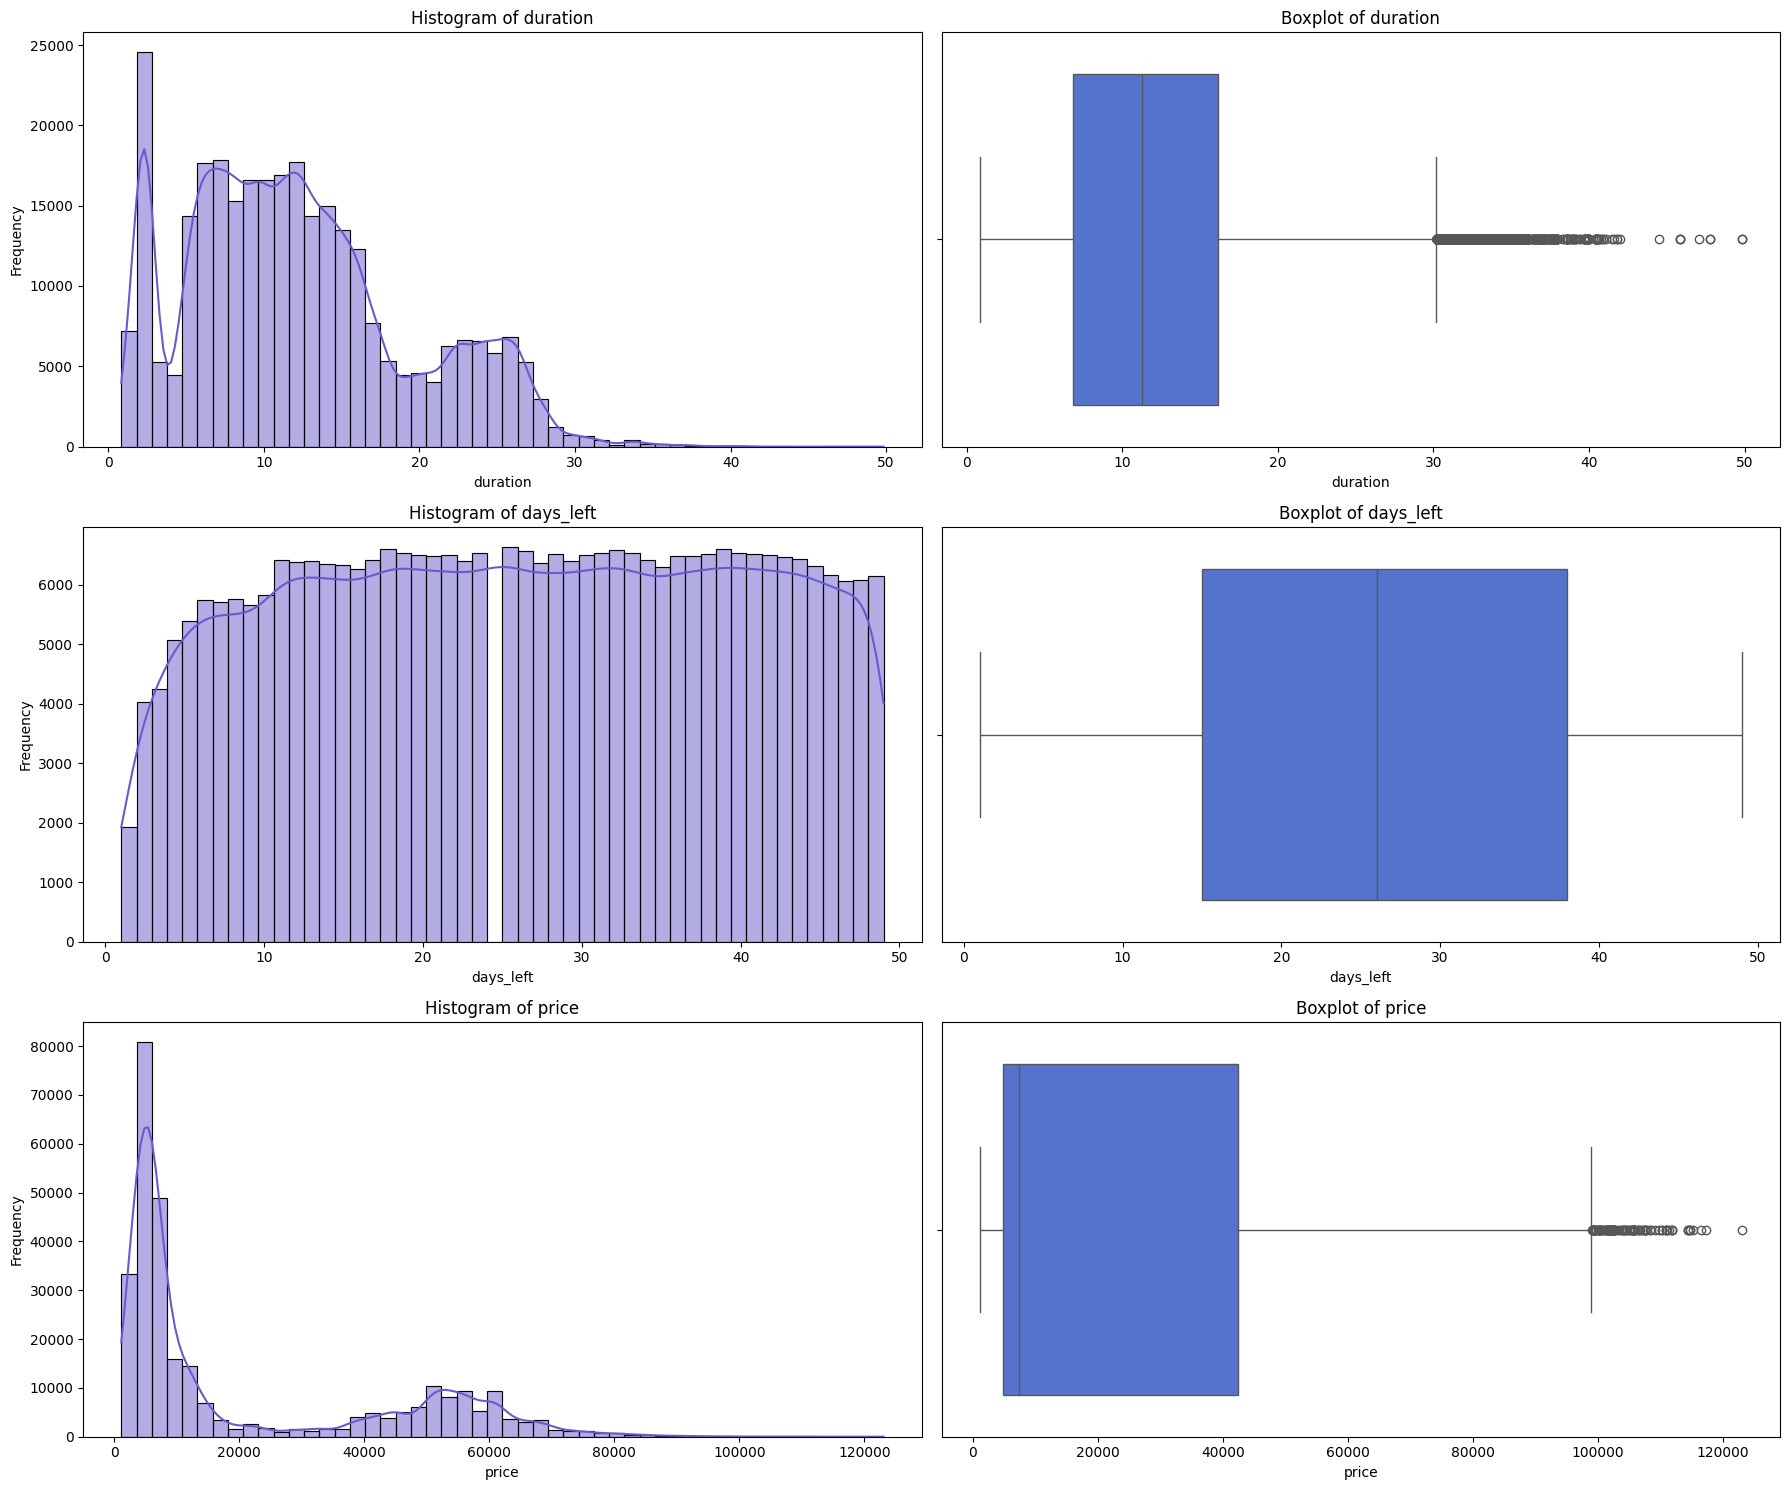

In [ ]:
numerical_cols = [i for i in df.columns if df[i].dtypes not in ['object', 'bool']]
plt.figure(figsize=(18,15))

for index, col in enumerate(numerical_cols):
    
    plt.subplot(len(numerical_cols), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='slateblue', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(len(numerical_cols), 2, index *2 + 2)
    sns.boxplot(x=df[col], color='royalblue')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### B. Korelasi Variabel Numerik

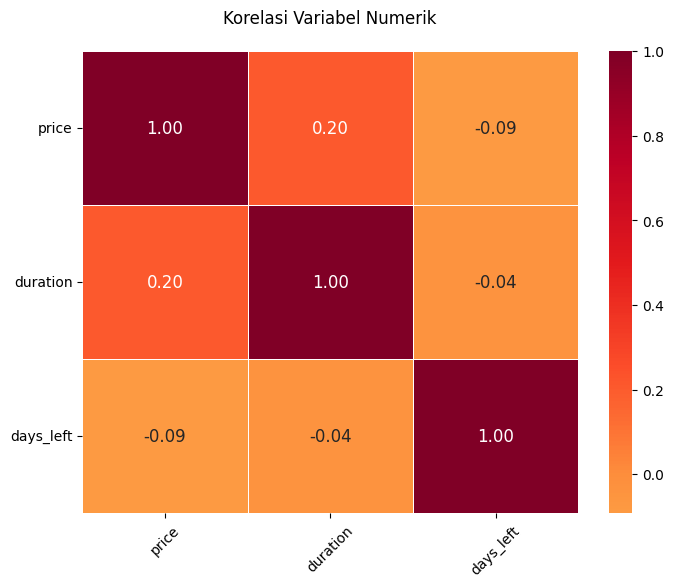

In [12]:
numerical_cols = ['price', 'duration', 'days_left']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', center=0,
           fmt='.2f', linewidths=0.5, annot_kws={'size':12})
plt.title('Korelasi Variabel Numerik', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### C. Rata-Rata Harga Maskapai

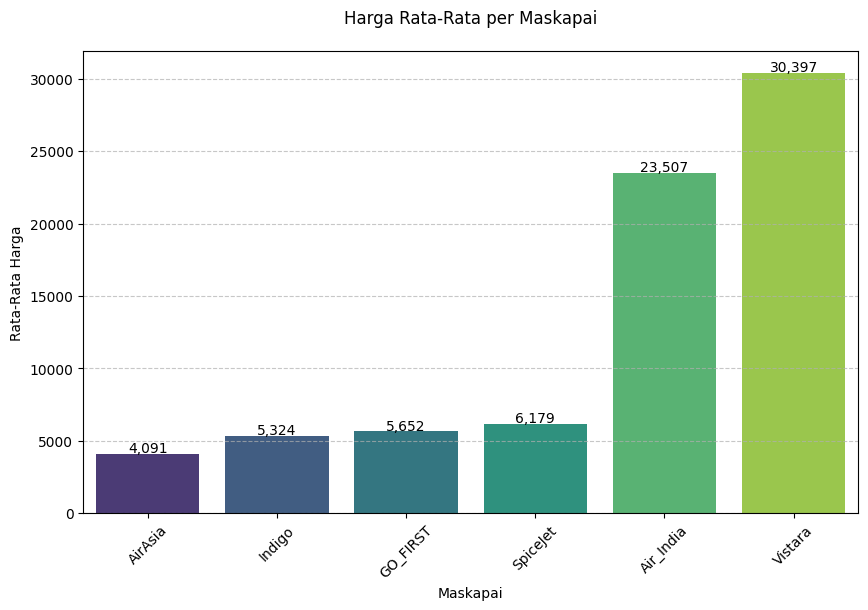

In [13]:
price_mean = df.groupby('airline')['price'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=price_mean.index, y=price_mean.values, palette='viridis')
plt.title('Harga Rata-Rata per Maskapai', pad=20)
plt.xlabel('Maskapai')
plt.ylabel('Rata-Rata Harga')
plt.xticks(rotation=45)
for i, v in enumerate(price_mean.values):
    plt.text(i, v+100, f"{v:,.0f}", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### D. Rata-Rata Harga Tiket per Maskapai Berdasarkan Kelas

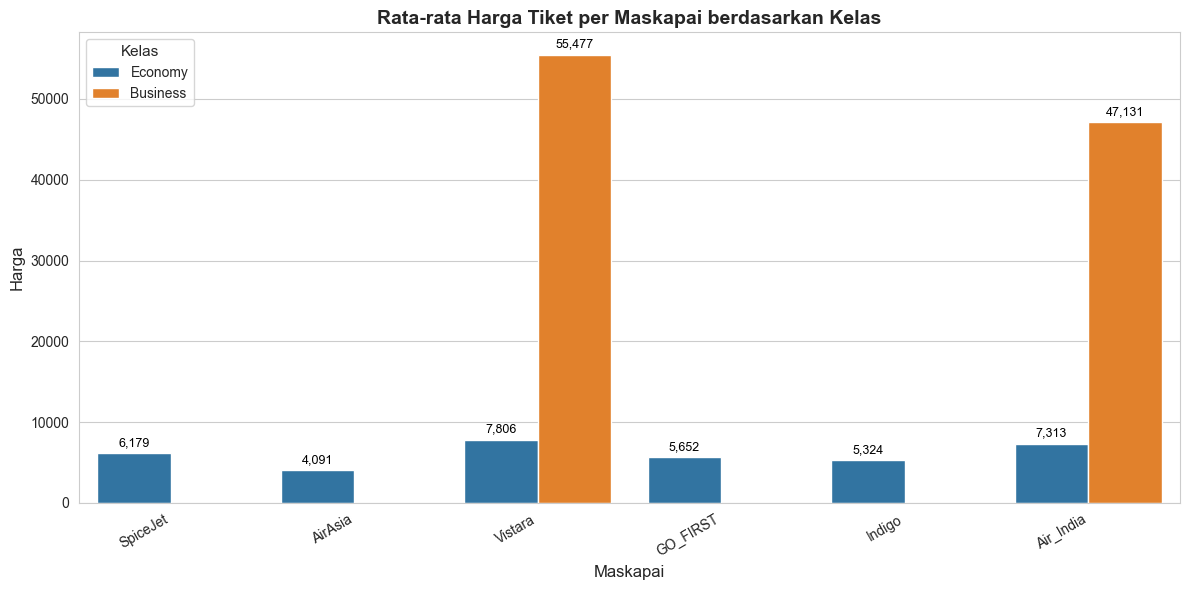

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(data=df, x='airline', y='price', hue='class', ci=None)

plt.title('Rata-rata Harga Tiket per Maskapai berdasarkan Kelas', fontsize=14, weight='bold')
plt.xlabel('Maskapai', fontsize=12)
plt.ylabel('Harga', fontsize=12)

plt.xticks(rotation=30, ha='right')
plt.legend(title='Kelas', title_fontsize=11)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height):,}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.show()

## Domestic Flight Analysis

### A. Price vs Days Left

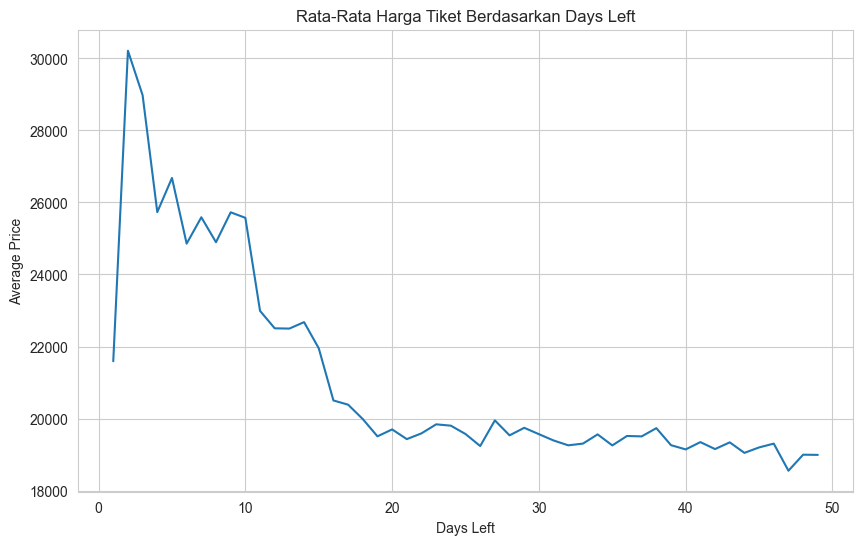

In [ ]:
avg_price_per_day = df.groupby('days_left')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_per_day, x='days_left', y='price')
plt.title('Rata-Rata Harga Tiket Berdasarkan Days Left')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

##### Insight & Rekomendasi

**Insight**

1. **Harga Tiket Cenderung Menurun Seiring Bertambahnya Days Left**  
   - Di awal (H-0 hingga H-3), harga rata-rata tiket berada di kisaran **±29.000–30.000**, menunjukkan harga tertinggi saat mendekati keberangkatan.  
   - Setelah H-3, harga mulai menurun signifikan hingga stabil di kisaran **±19.000** setelah H-20.

2. **Puncak Harga Terjadi di H-1 hingga H-2**  
   - Lonjakan harga signifikan terlihat pada H-1 dan H-2, kemungkinan akibat permintaan mendadak (*last minute booking*).

3. **Harga Stabil Setelah H-25**  
   - Harga cenderung tidak banyak berubah mulai dari H-25 hingga H-50, menunjukkan periode harga paling konsisten dan relatif murah.

**Rekomendasi**

> Untuk Konsumen
- **Pesan Tiket Lebih Awal (≥ 25 Hari Sebelum Keberangkatan)**  
  Membeli tiket setidaknya 3–4 minggu sebelum keberangkatan memberikan peluang mendapatkan harga termurah di kisaran ±19.000.  
- **Hindari Pembelian Mendekati Hari Keberangkatan**  
  Terutama pada H-1 dan H-2, di mana harga bisa melonjak lebih dari 50% dibanding periode stabil.

> Untuk Perusahaan/Penyedia Tiket
- **Promosi Early Booking**  
  Tawarkan promo *Early Bird* untuk pembelian ≥25 hari sebelum keberangkatan guna meningkatkan penjualan di periode harga stabil.  
- **Strategi Dynamic Pricing**  
  Naikkan harga secara bertahap mulai dari H-10 dan berikan lonjakan signifikan pada H-3 hingga H-1 untuk memaksimalkan margin dari pembeli last minute.  
- **Fitur Notifikasi Harga**  
  Kirimkan peringatan otomatis ke calon pembeli yang memantau rute tertentu:  
  "Harga tiket Anda bisa naik hingga 50% jika menunda pembelian. Pesan sekarang untuk hemat biaya!"

### B. Price vs Duration

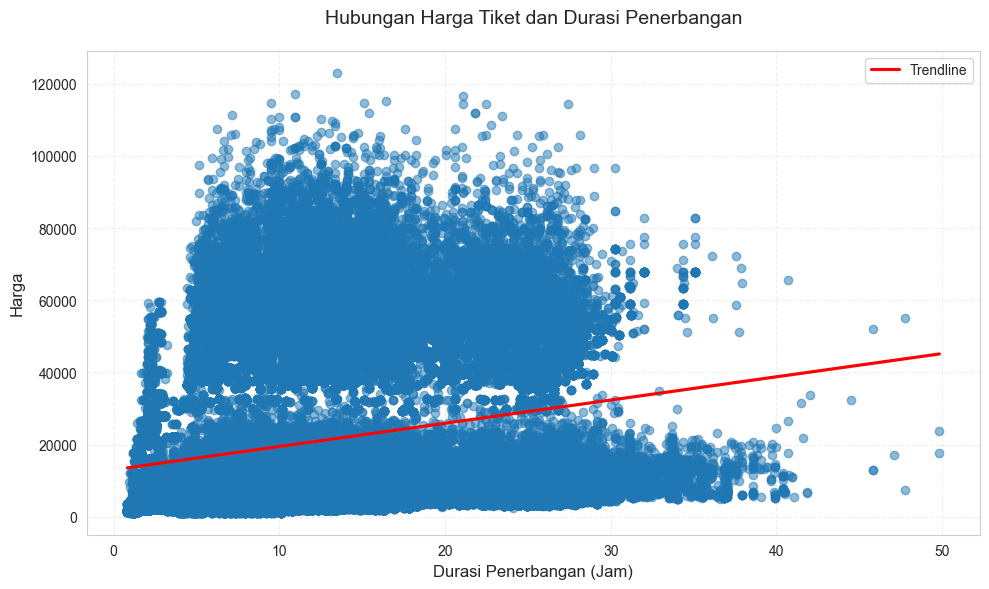

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='duration', y='price', 
            scatter_kws={'alpha':0.5, 'color':'#1f77b4'}, 
            line_kws={'color':'red', 'label':'Trendline'})
plt.title('Hubungan Harga Tiket dan Durasi Penerbangan', pad=20, fontsize=14)
plt.xlabel('Durasi Penerbangan (Jam)', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

##### Insight & Rekomendasi

**Insight**
- Korelasi positif lemah antara durasi dan harga: harga cenderung naik seiring durasi, tetapi kenaikannya tidak signifikan.
- Pada durasi penerbangan kurang dari 10 jam, harga tiket sangat bervariasi, kemungkinan dipengaruhi oleh maskapai, pemberhentian, rute, atau kelas layanan.
- Penerbangan dengan durasi lebih dari 30 jam tidak selalu mahal, kemungkinan karena transit lama atau maskapai berbiaya rendah.
- Terdapat outlier dengan harga sangat tinggi yang jauh di atas rata-rata, kemungkinan merupakan kelas premium atau rute tertentu.

**Rekomendasi**
- Lakukan segmentasi harga berdasarkan durasi penerbangan (<5 jam, 5–10 jam, >10 jam) untuk melihat pola yang lebih jelas.
- Analisis faktor tambahan seperti maskapai, rute, transit, dan kelas untuk mengidentifikasi penyebab variasi harga.
- Optimalkan harga untuk penerbangan berdurasi pendek agar tetap kompetitif di segmen yang memiliki variasi harga besar.
- Evaluasi outlier harga untuk memastikan harga sesuai dengan value yang ditawarkan.
- Manfaatkan promosi untuk penerbangan jarak jauh yang harganya relatif murah guna menarik pelanggan yang sensitif terhadap harga.

### C. Price vs Departure Time

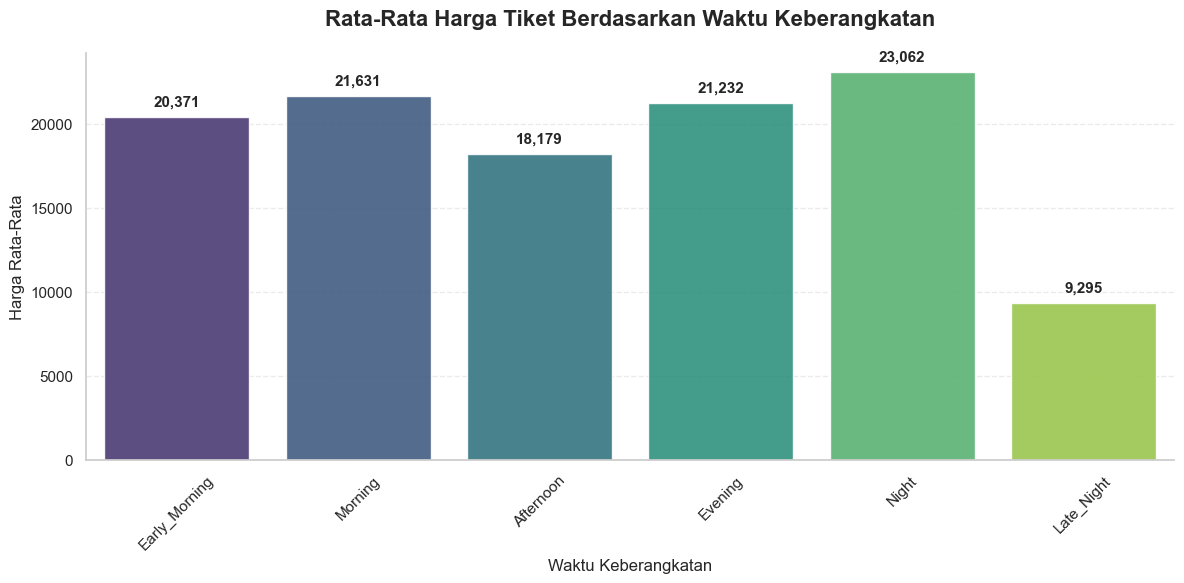

In [ ]:
sns.set_theme(style="whitegrid")

time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

avg_prices = df.groupby('departure_time')['price'].mean().reindex(time_order)

colors = sns.color_palette("viridis", len(time_order))

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x=avg_prices.index, 
    y=avg_prices.values,
    order=time_order,
    palette=colors,
    alpha=0.9
)

for i, price in enumerate(avg_prices.values):
    barplot.text(
        i, price + 500,
        f'{price:,.0f}', 
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Rata-Rata Harga Tiket Berdasarkan Waktu Keberangkatan', 
          pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Waktu Keberangkatan', fontsize=12)
plt.ylabel('Harga Rata-Rata', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

##### Insight & Rekomendasi

**Insight**
- Waktu keberangkatan dengan harga tiket tertinggi adalah malam (Night) dengan rata-rata Rp 23.062.
- Waktu keberangkatan dengan harga tiket terendah adalah larut malam (Late_Night) dengan rata-rata Rp 9.295.
- Penerbangan siang (Afternoon) memiliki rata-rata harga terendah kedua setelah Late_Night, yaitu Rp 18.179.
- Perbedaan harga antara waktu keberangkatan yang tinggi (Night) dan rendah (Late_Night) cukup signifikan, lebih dari dua kali lipat.
- Pola harga menunjukkan bahwa penerbangan malam cenderung lebih mahal, kemungkinan karena tingginya permintaan pada jam tersebut.

**Rekomendasi**
- Untuk pengguna yang sensitif terhadap harga, sorot penerbangan di waktu **Late_Night** dan **Afternoon** sebagai opsi ekonomis melalui fitur filter dan rekomendasi di aplikasi.
- Pertahankan harga premium di jam **Night** untuk memaksimalkan pendapatan, namun pastikan value proposition (layanan, kenyamanan, fleksibilitas) sebanding.
- Gunakan strategi **flash sale** atau **diskon terbatas** pada slot jam harga tinggi untuk mengisi kursi di luar jam sibuk.
- Lakukan analisis lanjutan penyebab tingginya harga di jam **Night** (permintaan tinggi atau keterbatasan kapasitas) untuk mengoptimalkan strategi penetapan harga.
- Optimalkan penawaran jadwal di **Afternoon** dan **Late_Night** pada halaman rekomendasi untuk menonjolkan value terbaik dan mendorong booking di jam dengan permintaan rendah.

### D. Price vs Arrival Time

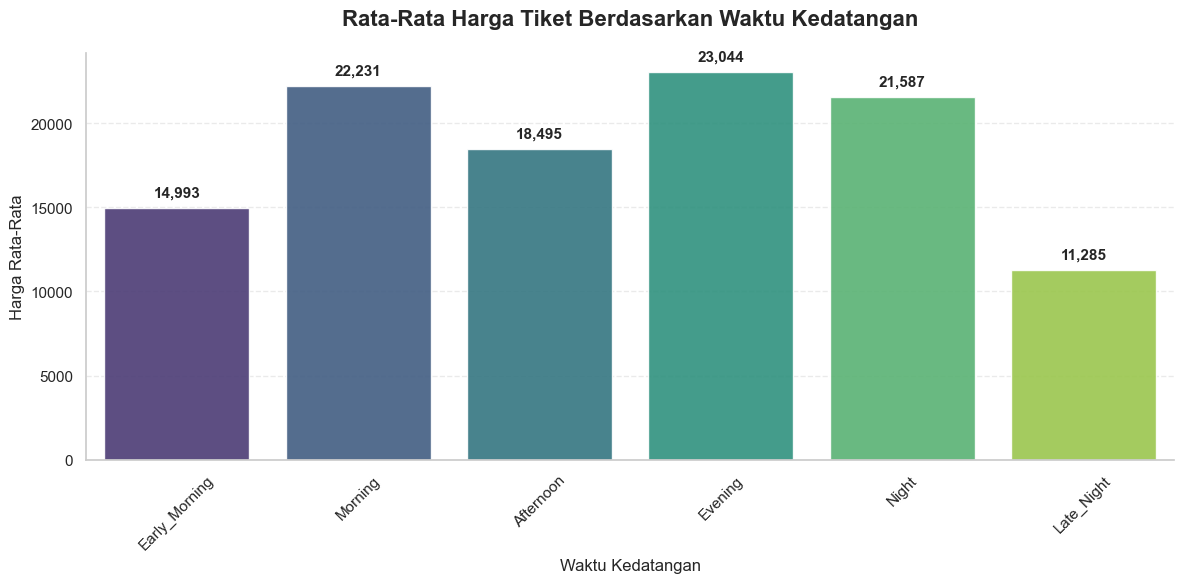

In [39]:
sns.set_theme(style="whitegrid")

time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

avg_prices = df.groupby('arrival_time')['price'].mean().reindex(time_order)

colors = sns.color_palette("viridis", len(time_order))

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x=avg_prices.index, 
    y=avg_prices.values,
    order=time_order,
    palette=colors,
    alpha=0.9
)

for i, price in enumerate(avg_prices.values):
    barplot.text(
        i, price + 500,
        f'{price:,.0f}', 
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Rata-Rata Harga Tiket Berdasarkan Waktu Kedatangan', 
          pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Waktu Kedatangan', fontsize=12)
plt.ylabel('Harga Rata-Rata', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

##### Insight & Rekomendasi

**Insight**

- Harga tiket tertinggi ada pada waktu Evening (Rp 23.044), diikuti oleh Morning (Rp 22.231) dan Night (Rp 21.587).
- Harga tiket terendah adalah Late_Night (Rp 11.285), hampir setengah dari harga Evening.
- Early_Morning juga relatif rendah (Rp 14.993), selisih cukup besar dari Morning meski hanya berbeda beberapa jam keberangkatan.
- Afternoon berada di tengah (Rp 18.495), relatif lebih terjangkau dibandingkan Morning atau Evening.
- Pola harga menunjukkan lonjakan signifikan di jam Morning dan Evening, yang kemungkinan besar disebabkan tingginya permintaan pada jam tersebut.

**Rekomendasi**

1. **Optimalkan Penawaran di Jam Tinggi**  
   Pertahankan harga premium di Morning dan Evening, tetapi tawarkan paket bundling (misalnya dengan bagasi gratis atau voucher makan) untuk menambah nilai tanpa mengorbankan margin.

2. **Dorong Penjualan di Jam Rendah**  
   Luncurkan kampanye diskon atau promo flash sale untuk Late_Night dan Early_Morning guna menarik penumpang baru serta meningkatkan keterisian kursi.

3. **Segmentasi Penumpang Berdasarkan Kebutuhan Waktu**  
   - Penumpang bisnis: targetkan di Morning dan Evening dengan promosi layanan cepat dan fleksibel.
   - Penumpang leisure: arahkan ke Afternoon atau Late_Night dengan harga ekonomis dan promosi paket liburan.

4. **Uji Penyesuaian Harga di Early_Morning**  
   Naikkan harga sedikit di Early_Morning untuk menguji elastisitas permintaan, karena selisihnya dengan Morning cukup besar.

5. **Optimalkan Rekomendasi Jadwal & Hargaa**  
   Gunakan data pola harga dan permintaan untuk memprioritaskan penampilan jadwal dengan rasio harga/value terbaik di halaman pencarian, agar meningkatkan konversi pembelian.

### E. Price vs Stops

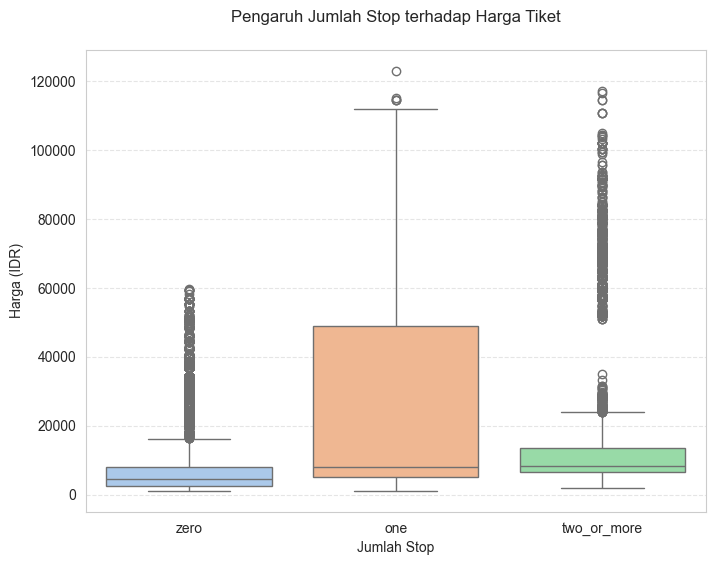

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='stops', y='price', palette='pastel',
           order=['zero', 'one', 'two_or_more'])
plt.title('Pengaruh Jumlah Stop terhadap Harga Tiket', pad=20)
plt.xlabel('Jumlah Stop')
plt.ylabel('Harga (IDR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Insight & Rekomendasi

**Insight**
- **Harga tiket dengan satu stop** cenderung memiliki variasi harga yang paling tinggi, dengan rentang dari sangat rendah hingga di atas 120.000 IDR.  
- **Penerbangan tanpa stop** memiliki harga median terendah dan lebih konsisten, meski masih ada beberapa outlier mahal.  
- **Penerbangan dengan dua stop atau lebih** umumnya memiliki harga sedikit lebih tinggi dari penerbangan tanpa stop, namun tetap lebih rendah dan stabil dibanding penerbangan satu stop.  

**Rekomendasi**
- **Optimalkan rute satu stop** dengan mengidentifikasi faktor penyebab harga tinggi (misalnya durasi transit atau operator tertentu) untuk menyesuaikan strategi harga.  
- **Promosikan penerbangan tanpa stop** sebagai opsi “value for money” bagi penumpang yang mengutamakan efisiensi harga.  
- **Evaluasi rute dua stop atau lebih** untuk melihat potensi paket bundling atau diskon yang dapat meningkatkan minat tanpa mengorbankan margin keuntungan.  


### F. Busiest Route

In [36]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [35]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

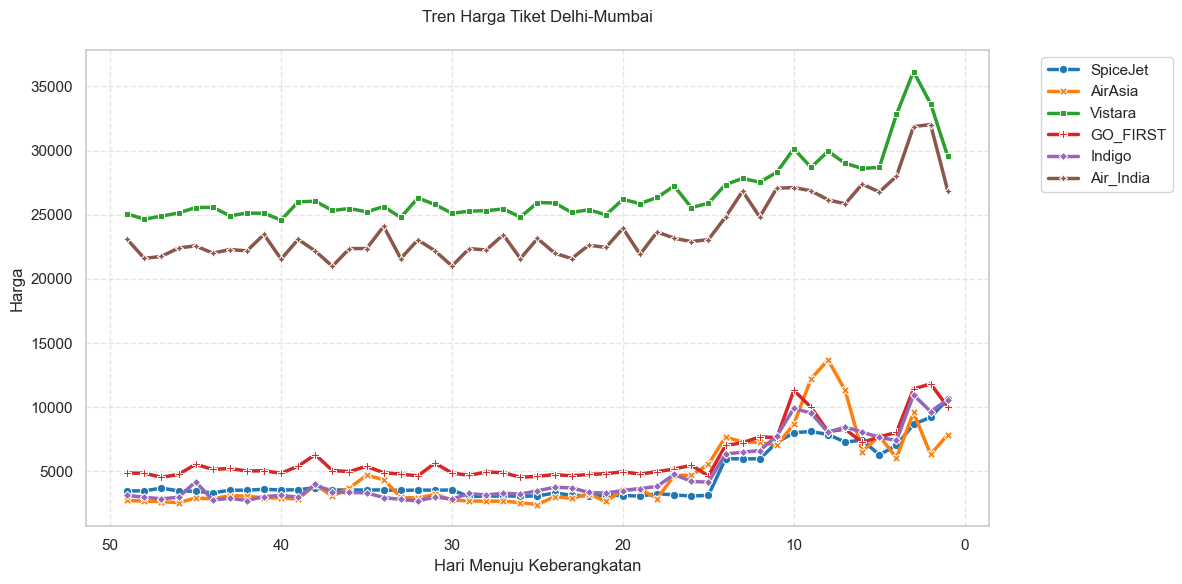

In [37]:
route_df = df[(df['source_city']=='Delhi') & (df['destination_city']=='Mumbai')]
plt.figure(figsize=(12,6))
sns.lineplot(data=route_df, x='days_left', y='price', 
            hue='airline', style='airline',
            markers=True, dashes=False, ci=None,
            palette='tab10', linewidth=2.5)
plt.title('Tren Harga Tiket Delhi-Mumbai', pad=20)
plt.xlabel('Hari Menuju Keberangkatan')
plt.ylabel('Harga')
plt.gca().invert_xaxis()
plt.grid(linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Insight & Rekomendasi

**Insight**
- **Vistara** dan **Air India** memiliki harga yang jauh lebih tinggi dibanding maskapai lain, konsisten sejak 50 hari sebelum keberangkatan, dengan lonjakan signifikan 5–10 hari sebelum keberangkatan. Hal ini sejalan dengan positioning mereka sebagai maskapai premium yang menawarkan layanan full-service, termasuk kelas bisnis yang menjadi daya tarik utama bagi segmen penumpang korporat dan pelancong yang mengutamakan kenyamanan.  
- Maskapai berbiaya rendah seperti **SpiceJet**, **AirAsia**, dan **Indigo** cenderung mempertahankan harga rendah, namun mengalami kenaikan tajam mulai 10 hari sebelum keberangkatan.  
- **GO_FIRST** memiliki harga menengah dengan pola kenaikan serupa menjelang keberangkatan, namun kenaikannya tidak setinggi AirAsia.  
- Semua maskapai menunjukkan tren kenaikan harga mendekati hari H, menandakan adanya strategi dynamic pricing berdasarkan urgensi pembelian.  

**Rekomendasi**
- **Untuk rute premium (Vistara & Air India)**: Pertahankan strategi harga tinggi untuk target penumpang bisnis atau premium, namun pertimbangkan promo early-bird >20 hari sebelum keberangkatan untuk mengisi kursi lebih awal.  
- **Untuk maskapai berbiaya rendah**: Gunakan strategi harga agresif di 20–10 hari sebelum keberangkatan untuk menarik penumpang last-minute, sambil menjaga margin dengan kenaikan harga mendekati hari H.  
- **Cross-promotion antar segmen**: Tawarkan bundle atau upsell (misalnya bagasi gratis atau kursi pilihan) pada maskapai murah untuk bersaing dengan nilai tambah, bukan hanya harga.  
- **Monitoring real-time**: Implementasikan sistem alert harga kompetitor untuk penyesuaian cepat, khususnya pada periode 10 hari terakhir sebelum keberangkatan.  